Импортируем библиотеки

In [51]:

import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Создание и визуализация датасетов

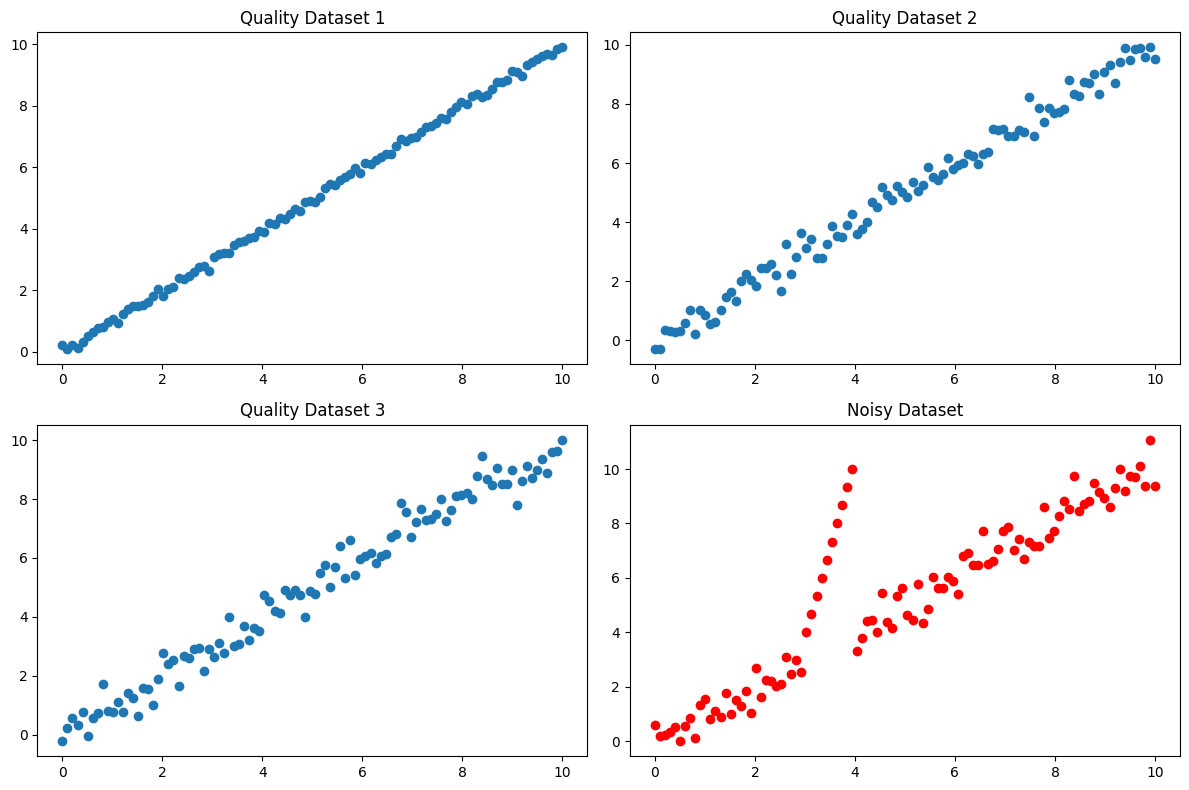

In [52]:

def generate_linear_data(slope=1, intercept=0, noise_level=0.5, points=100):
    X = np.linspace(0, 10, points)
    y = slope * X + intercept + np.random.normal(scale=noise_level, size=points)
    return pd.DataFrame({'X': X, 'y': y})

def generate_noisy_data():
    X = np.linspace(0, 10, 100)
    y = X + np.random.normal(scale=0.5, size=100)
    y[30:40] = np.linspace(4, 10, 10)  # Добавляем шум
    return pd.DataFrame({'X': X, 'y': y})

# Создаем качественные датасеты
datasets = [generate_linear_data(noise_level=noise) for noise in [0.1, 0.3, 0.5]]

# Создаем зашумленный датасет
noisy_dataset = generate_noisy_data()

# Сохраняем датасеты
for idx, dataset in enumerate(datasets):
    dataset.to_csv(f'quality_dataset_{idx+1}.csv', index=False)
noisy_dataset.to_csv('noisy_dataset.csv', index=False)

# Визуализация датасетов
plt.figure(figsize=(12, 8))
for idx, dataset in enumerate(datasets):
    plt.subplot(2, 2, idx+1)
    plt.scatter(dataset['X'], dataset['y'])
    plt.title(f'Quality Dataset {idx+1}')
plt.subplot(2, 2, 4)
plt.scatter(noisy_dataset['X'], noisy_dataset['y'], color='red')
plt.title('Noisy Dataset')
plt.tight_layout()
plt.show()

Обучение модели

In [56]:

# Загрузка первого  датасета
dataset = pd.read_csv('quality_dataset_1.csv')

# Обучение модели линейной регрессии
X = dataset[['X']]
y = dataset['y']
model = LinearRegression()
model.fit(X, y)

# Сохранение модели в файл
joblib.dump(model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

Тестирование модели с использованием PyTest

In [57]:
%%writefile test_model.py

import joblib
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score


# Загрузка модели
model = joblib.load('linear_regression_model.pkl')

def load_data(name):
    return pd.read_csv(name)

def compute_metrics(data):
    X = data[['X']]
    y_true = data['y']
    y_pred = model.predict(X)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

def execute_test(name, mse_threshold=0.3, r2_threshold=0.95, is_data_correct=True):
    data = load_data(name)
    mse, r2 = compute_metrics(data)
    data_correct_check = mse < mse_threshold and r2 > r2_threshold
    assert is_data_correct == data_correct_check, f"Test failed for {name}: MSE={mse}, R2={r2}"

def test_data_1():
    execute_test('quality_dataset_1.csv')

def test_data_2():
    execute_test('quality_dataset_2.csv')

def test_data_3():
    execute_test('quality_dataset_3.csv')

def test_data_corrupted():
    execute_test('noisy_dataset.csv', mse_threshold=0.5, r2_threshold=0.9, is_data_correct=False)


Overwriting test_model.py


Запуск автотестов

In [58]:
!pytest test_model.py

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0
rootdir: /content
plugins: anyio-3.7.1
collected 4 items                                                                                  

test_model.py ....                                                                           [100%]

======================================== 4 passed in 1.11s =========================================
